# Importing libraries 

In [249]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Packages
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Sklearn Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score

# Visualizes all the columns
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
#from sklearn.utils.testing import ignore_warnings
#from sklearn.exceptions import ConvergenceWarning

# Examine Data 

When downloading the data, I chose not to include uncertanties, as they aren't very relevant to the actual values of the data and may have negative affects on the model. 

In [250]:
data = pd.read_csv("kepler_objects_interest.csv")
print(data.shape)
data.head()

(9564, 83)


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10829.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1.0,q1_q17_dr25_tce,11111101110111011000000000000000,0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8079.2,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3.278,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2865,0.3556,q1_q17_dr25_koi,39.066550,541.895100,505.6,1,621.0,1.0,q1_q17_dr25_tce,11111110111011101000000000000000,0.0000,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010848/010848459/dv/kplr010848459-20160209...,010/010848/010848459/dv/kplr010848459-001-2016...,5805.0,4.564,-0.52,0.791,0.836,NaN,q1_q17_dr25_stellar,285.53461,48.285210,15.5

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2673 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_vet_stat       9564 non-null   object 
 6   koi_vet_date       9564 non-null   object 
 7   koi_pdisposition   9564 non-null   object 
 8   koi_score          8054 non-null   float64
 9   koi_fpflag_nt      9564 non-null   int64  
 10  koi_fpflag_ss      9564 non-null   int64  
 11  koi_fpflag_co      9564 non-null   int64  
 12  koi_fpflag_ec      9564 non-null   int64  
 13  koi_disp_prov      9564 non-null   object 
 14  koi_comment        8355 non-null   object 
 15  koi_period         9564 non-null   float64
 16  koi_time0bk        9564 

Notes on columns:

Orbital Period

Transit Epoch BKJD

Transit Epoch BJD

Eccentricity all 0

Long. of Periastron: Longitude of point closest to star in orbit of exoplanet

Impact Parameter: ??

Transit Duration: time in hours

Ingress Duration: All NaN, but prob can be calculated(TM)

Transit Depth: ratio of the area of the planet to the area of the star, in ppm

Planet-Star Radius Ratio

Fitted Stellar Density: g/cm^3

Planetary Fit Type: ??

Orbital Semi-Major Axis: in AU

Inclination: inclination of orbit

Equilibrium Tempereature: temp of planet in K  (VERY IMPORTANT??)

Insolation Flux: solar flux density in terms of earth flux

Planet-Star Distance over Star Radius: check if hot jupiter ig

Limb darkening stuff: central part of disk appears brighter than edge, idt very important

bruh im fcking stupid apparently this exists: https://exoplanetarchive.ipac.caltech.edu/docs/TableColumnDescriptors.html

In [252]:
# Rename columns to English names
data = data.rename(columns = {
"kepid":"KepID",
"kepoi_name":"KOIName",
"kepler_name":"KeplerName",
"koi_disposition":"ExoplanetArchiveDisposition",
"koi_vet_stat":"VettingStatus",
"koi_vet_date":"DateofLastParameterUpdate",
"koi_pdisposition":"DispositionUsingKeplerData",
"koi_score":"DispositionScore",
"koi_fpflag_nt":"NotTransitLikeFalsePositiveFlag",
"koi_fpflag_ss":"StellarEclipseFalsePositiveFlag",
"koi_fpflag_co":"CentroidOffsetFalsePositiveFlag",
"koi_fpflag_ec":"EphemerisMatchIndicatesContaminationFalsePositiveFlag",
"koi_disp_prov":"DispositionProvenance",
"koi_comment":"Comment",
"koi_period":"OrbitalPeriod",
"koi_time0bk":"TransitEpochBKJD",
"koi_time0":"TransitEpochBJD",
"koi_eccen":"Eccentricity",
"koi_longp":"Long.ofPeriastron",
"koi_impact":"ImpactParameter",
"koi_duration":"TransitDuration",
"koi_ingress":"IngressDuration",
"koi_depth":"TransitDepth",
"koi_ror":"Planet-StarRadiusRatio",
"koi_srho":"FittedStellarDensity",
"koi_fittype":"PlanetaryFitType",
"koi_prad":"PlanetaryRadius",
"koi_sma":"OrbitSemi-MajorAxis",
"koi_incl":"Inclination",
"koi_teq":"EquilibriumTemperature",
"koi_insol":"InsolationFlux",
"koi_dor":"Planet-StarDistanceoverStarRadius",
"koi_limbdark_mod":"LimbDarkeningModel",
"koi_ldm_coeff4":"LimbDarkeningCoeff.4",
"koi_ldm_coeff3":"LimbDarkeningCoeff.3",
"koi_ldm_coeff2":"LimbDarkeningCoeff.2",
"koi_ldm_coeff1":"LimbDarkeningCoeff.1",
"koi_parm_prov":"ParametersProvenance",
"koi_max_sngle_ev":"MaximumSingleEventStatistic",
"koi_max_mult_ev":"MaximumMultipleEventStatistic",
"koi_model_snr":"TransitSignal-to-Noise",
"koi_count":"NumberofPlanets",
"koi_num_transits":"NumberofTransits",
"koi_tce_plnt_num":"TCEPlanetNumber",
"koi_tce_delivname":"TCEDelivery",
"koi_quarters":"Quarters",
"koi_bin_oedp_sig":"Odd-EvenDepthComparisionStatistic",
"koi_trans_mod":"TransitModel",
"koi_model_dof":"DegreesofFreedom",
"koi_model_chisq":"Chi-Square",
"koi_datalink_dvr":"LinktoDVReport",
"koi_datalink_dvs":"LinktoDVSummary",
"koi_steff":"StellarEffectiveTemperature",
"koi_slogg":"StellarSurfaceGravity",
"koi_smet":"StellarMetallicity",
"koi_srad":"StellarRadius",
"koi_smass":"StellarMass",
"koi_sage":"StellarAge",
"koi_sparprov":"StellarParameterProvenance",
"ra":"RA",
"dec":"Dec",
"koi_kepmag":"Kepler-band",
"koi_gmag":"g'-band",
"koi_rmag":"r'-band",
"koi_imag":"i'-band",
"koi_zmag":"z'-band",
"koi_jmag":"J-band",
"koi_hmag":"H-band",
"koi_kmag":"K-band",
"koi_fwm_stat_sig":"FWOffsetSignificance",
"koi_fwm_sra":"FWSourceAlpha",
"koi_fwm_sdec":"FWSourceDelta",
"koi_fwm_srao":"FWSourceAlphaDiff",
"koi_fwm_sdeco":"FWSourceDeltaDiff",
"koi_fwm_prao":"FWAlphaDiff",
"koi_fwm_pdeco":"FWDeltaDiff",
"koi_dicco_mra":"PRFAlphaSQDiff",
"koi_dicco_mdec":"PRFDeltaSQDiff",
"koi_dicco_msky":"PRFThetaSQDiffarcsec",
"koi_dikco_mra":"PRFAlphaSQDiffKIC",
"koi_dikco_mdec":"PRFDeltaSQDiffKIC",
"koi_dikco_msky":"PRFThetaSQDiffKIC"
})

In [253]:
data.head()

,rowid,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,VettingStatus,DateofLastParameterUpdate,DispositionUsingKeplerData,DispositionScore,NotTransitLikeFalsePositiveFlag,StellarEclipseFalsePositiveFlag,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,DispositionProvenance,Comment,OrbitalPeriod,TransitEpochBKJD,TransitEpochBJD,Eccentricity,Long.ofPeriastron,ImpactParameter,TransitDuration,IngressDuration,TransitDepth,Planet-StarRadiusRatio,FittedStellarDensity,PlanetaryFitType,PlanetaryRadius,OrbitSemi-MajorAxis,Inclination,EquilibriumTemperature,InsolationFlux,Planet-StarDistanceoverStarRadius,LimbDarkeningModel,LimbDarkeningCoeff.4,LimbDarkeningCoeff.3,LimbDarkeningCoeff.2,LimbDarkeningCoeff.1,ParametersProvenance,MaximumSingleEventStatistic,MaximumMultipleEventStatistic,TransitSignal-to-Noise,NumberofPlanets,NumberofTransits,TCEPlanetNumber,TCEDelivery,Quarters,Odd-EvenDepthComparisionStatistic,TransitModel,DegreesofFreedom,Chi-Square,LinktoDVReport,LinktoDVSummary,StellarEffectiveTemperature,StellarSurfaceGravity,StellarMetallicity,StellarRadius,StellarMass,StellarAge,StellarParameterProvenance,RA,Dec,Kepler-band,g'-band,r'-band,i'-band,z'-band,J-band,H-band,K-band,FWOffsetSignificance,FWSourceAlpha,FWSourceDelta,FWSourceAlphaDiff,FWSourceDeltaDiff,FWAlphaDiff,FWDeltaDiff,PRFAlphaSQDiff,PRFDeltaSQDiff,PRFThetaSQDiffarcsec,PRFAlphaSQDiffKIC,PRFDeltaSQDiffKIC,PRFThetaSQDiffKIC
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10829.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1.0,q1_q17_dr25_tce,11111101110111011000000000000000,0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8079.2,0.387394,0.22080,LS

# Functions for each model

In [291]:
# gets features
def get_features(data):
    features = data.drop(columns = ["ExoplanetCandidate", "ExoplanetConfirmed"])
    return features

In [292]:
# gets targets
def get_targets(data):
    targets = data["ExoplanetCandidate"]
    return targets

In [268]:
# tests all the regressions
def test_models(features, targets, tst_size):
    print("Proportion of testing size:", tst_size)
    
    X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state = 42, test_size = tst_size)
    
    #lin_reg(X_train, X_test, y_train, y_test)
    log_reg(X_train, X_test, y_train, y_test)
    knn(X_train, X_test, y_train, y_test)
    d_tree(X_train, X_test, y_train, y_test)
    rand_forest(X_train, X_test, y_train, y_test)
    #grid_search(X_train, X_test, y_train, y_test) DO NOT UNCOMMENT!!11!!ONE!

In [294]:
def evaluation(y_test, y_pred):
# Print Accuracy, Recall, F1 Score, and Precision metrics.
    print('Evaluation Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))
    
# Print Confusion Matrix
    print('Confusion Matrix:')
    print(' TN,  FP, FN, TP')
    print(confusion_matrix(y_test, y_pred).ravel())

In [270]:
# linear regression
def lin_reg(X_train, X_test, y_train, y_test):    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)
    evaluation(y_test, predictions)

maybe dont do linear bc this stuff too complex

In [271]:
# given a model, tests it
def run_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    evaluation(y_test, predictions)
    print("\n")

In [272]:
# logistic regression
def log_reg(X_train, X_test, y_train, y_test):
    print("Logistic Regression:")
    
    # chance c, class_weight, etc?
    model = LogisticRegression(C=100, class_weight='balanced', max_iter = 1000)
    run_model(model, X_train, X_test, y_train, y_test)

In [273]:
# k nearest neighbors
def knn(X_train, X_test, y_train, y_test):
    print("K nearest neighbors:")
    
    # change leaf_size, metric??
    model = KNeighborsClassifier(leaf_size = 8, metric = "manhattan")
    run_model(model, X_train, X_test, y_train, y_test)

In [274]:
# decision tree
def d_tree(X_train, X_test, y_train, y_test):
    print("Decision tree:")
    
    model = DecisionTreeClassifier()
    run_model(model, X_train, X_test, y_train, y_test)

In [275]:
# random forest
def rand_forest(X_train, X_test, y_train, y_test):
    print("Random forest:")
    
    model = RandomForestClassifier(n_estimators = 100, criterion = "gini")
    run_model(model, X_train, X_test, y_train, y_test)

In [276]:
# grid serach
def grid_search(X_train, X_test, y_train, y_test):
    print("Grid Search:")
    # GridSearch Parameters
    parameters = {
        'n_estimators': [5, 50, 100, 150, 200],
        'max_depth': list(range(1, 11)),
        'criterion':['gini','entropy'],
        'max_features': list(range(1,20)),
        'oob_score':[False,True],
    }

    forest = RandomForestClassifier(n_estimators=100, criterion='gini')
    grid = GridSearchCV(forest, parameters, cv=5, verbose=1, n_jobs=-1)

    grid.fit(X_train, y_train)
    y_test_grid = grid.predict(X_test)

    # Evaluating model
    evaluation(y_test, y_test_grid)

# Preprocessing Data

## Converting relevant nonfloat data into floats

In [254]:
data["ExoplanetCandidate"] = data["DispositionUsingKeplerData"].apply(lambda x : 1 if x == "CANDIDATE" else 0)

In [255]:
data["ExoplanetConfirmed"] = data["ExoplanetArchiveDisposition"].apply(lambda x : 2 if x == "CONFIRMED" else 1 if x == "CANDIDATE" else 0)

Since Quarters represents how much we observed the candidate, we can change that to a number representing how many 1s are in the string. 

In [256]:
def countOne(str):
    count = 0
    for c in str:
        if c == '1':
            count = count + 1
    return count

data["QuartersObserved"] = data["Quarters"].apply(lambda x : countOne(str(x)))

Planetary Fit Type has values of LS --> 0, MCMC --> 1, LS+MCMC --> 2

In [257]:
data["PlanetaryFit"] = data["PlanetaryFitType"].apply(lambda x : 0 if x == "LS" else 1 if x == "MCMC" else 2)

In [258]:
data.head()

,rowid,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,VettingStatus,DateofLastParameterUpdate,DispositionUsingKeplerData,DispositionScore,NotTransitLikeFalsePositiveFlag,StellarEclipseFalsePositiveFlag,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,DispositionProvenance,Comment,OrbitalPeriod,TransitEpochBKJD,TransitEpochBJD,Eccentricity,Long.ofPeriastron,ImpactParameter,TransitDuration,IngressDuration,TransitDepth,Planet-StarRadiusRatio,FittedStellarDensity,PlanetaryFitType,PlanetaryRadius,OrbitSemi-MajorAxis,Inclination,EquilibriumTemperature,InsolationFlux,Planet-StarDistanceoverStarRadius,LimbDarkeningModel,LimbDarkeningCoeff.4,LimbDarkeningCoeff.3,LimbDarkeningCoeff.2,LimbDarkeningCoeff.1,ParametersProvenance,MaximumSingleEventStatistic,MaximumMultipleEventStatistic,TransitSignal-to-Noise,NumberofPlanets,NumberofTransits,TCEPlanetNumber,TCEDelivery,Quarters,Odd-EvenDepthComparisionStatistic,TransitModel,DegreesofFreedom,Chi-Square,LinktoDVReport,LinktoDVSummary,StellarEffectiveTemperature,StellarSurfaceGravity,StellarMetallicity,StellarRadius,StellarMass,StellarAge,StellarParameterProvenance,RA,Dec,Kepler-band,g'-band,r'-band,i'-band,z'-band,J-band,H-band,K-band,FWOffsetSignificance,FWSourceAlpha,FWSourceDelta,FWSourceAlphaDiff,FWSourceDeltaDiff,FWAlphaDiff,FWDeltaDiff,PRFAlphaSQDiff,PRFDeltaSQDiff,PRFThetaSQDiffarcsec,PRFAlphaSQDiffKIC,PRFDeltaSQDiffKIC,PRFThetaSQDiffKIC,ExoplanetCandidate,ExoplanetConfirmed,QuartersObserved,PlanetaryFit
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,615.8,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320,1,2,17,2
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,874.8,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500,1,2,17,2
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10829.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,0.3858,q1_q17_dr25_koi,37.159767,187.449100,76.3,1,56.0,1.0,q1_q17_dr25_tce,11111101110111011000000000000000,0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027,1,1,14,2
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEE

<AxesSubplot:>

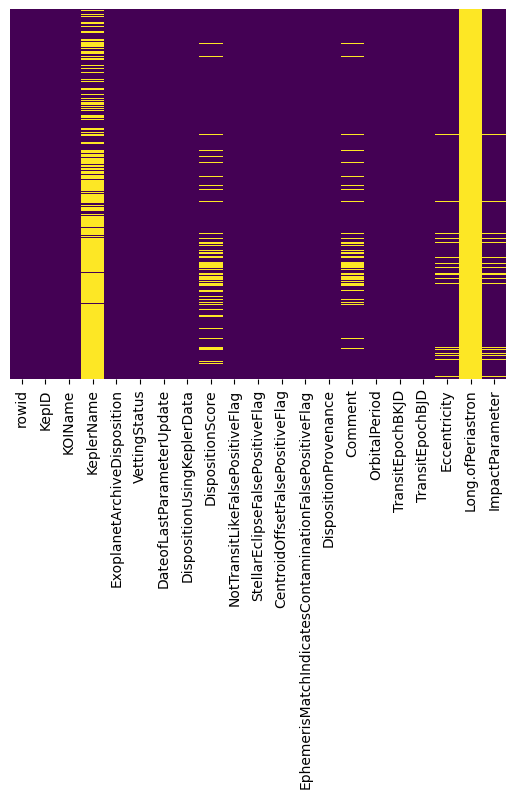

In [259]:
# see what we're missing
sns.heatmap(data.iloc[:, :21].isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

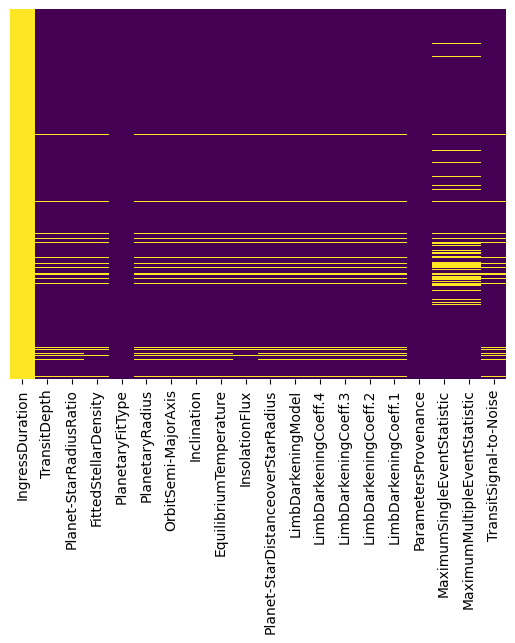

In [260]:
# see what we're missing
sns.heatmap(data.iloc[:, 22:42].isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

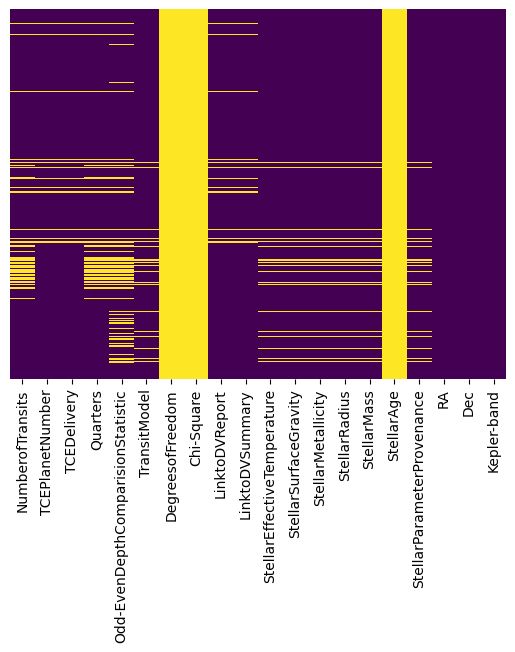

In [261]:
# see what we're missing
sns.heatmap(data.iloc[:, 43:63].isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

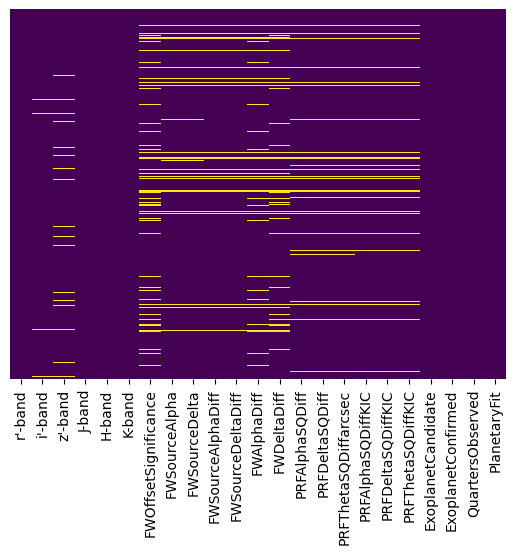

In [262]:
# see what we're missing
sns.heatmap(data.iloc[:, 64:].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [263]:
# Everything dropped is either something that's useless, all null/all 0, or bad for model
data.drop(columns = [
"rowid",
"KeplerName",
"KOIName",
"KepID",
"ExoplanetArchiveDisposition",
"VettingStatus",
"DateofLastParameterUpdate",
"DispositionUsingKeplerData",
"DispositionScore",
"NotTransitLikeFalsePositiveFlag",
"StellarEclipseFalsePositiveFlag",
"CentroidOffsetFalsePositiveFlag",
"EphemerisMatchIndicatesContaminationFalsePositiveFlag",
"DispositionProvenance",
"Comment",
"TransitEpochBKJD",
"TransitEpochBJD",
"Eccentricity",
"Long.ofPeriastron",
"IngressDuration",
"PlanetaryFitType",
"LimbDarkeningModel",
"LimbDarkeningCoeff.4",
"LimbDarkeningCoeff.3",
"ParametersProvenance",
"TCEDelivery",
"Quarters",
"TransitModel",
"DegreesofFreedom",
"Chi-Square",
"LinktoDVReport",
"LinktoDVSummary",
"StellarAge",
"StellarParameterProvenance"
], inplace = True)

In [264]:
data.head()

,OrbitalPeriod,ImpactParameter,TransitDuration,TransitDepth,Planet-StarRadiusRatio,FittedStellarDensity,PlanetaryRadius,OrbitSemi-MajorAxis,Inclination,EquilibriumTemperature,InsolationFlux,Planet-StarDistanceoverStarRadius,LimbDarkeningCoeff.2,LimbDarkeningCoeff.1,MaximumSingleEventStatistic,MaximumMultipleEventStatistic,TransitSignal-to-Noise,NumberofPlanets,NumberofTransits,TCEPlanetNumber,Odd-EvenDepthComparisionStatistic,StellarEffectiveTemperature,StellarSurfaceGravity,StellarMetallicity,StellarRadius,StellarMass,RA,Dec,Kepler-band,g'-band,r'-band,i'-band,z'-band,J-band,H-band,K-band,FWOffsetSignificance,FWSourceAlpha,FWSourceDelta,FWSourceAlphaDiff,FWSourceDeltaDiff,FWAlphaDiff,FWDeltaDiff,PRFAlphaSQDiff,PRFDeltaSQDiff,PRFThetaSQDiffarcsec,PRFAlphaSQDiffKIC,PRFDeltaSQDiffKIC,PRFThetaSQDiffKIC,ExoplanetCandidate,ExoplanetConfirmed,QuartersObserved,PlanetaryFit
0,9.488036,0.146,2.95750,615.8,0.022344,3.20796,2.26,0.0853,89.66,793.0,93.59,24.810,0.2291,0.4603,5.135849,28.470820,35.8,2,142.0,1.0,0.6864,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320,1,2,17,2
1,54.418383,0.586,4.50700,874.8,0.027954,3.02368,2.83,0.2734,89.57,443.0,9.11,77.900,0.2291,0.4603,7.027669,20.109507,25.8,2,25.0,2.0,0.0023,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500,1,2,17,2
2,19.899140,0.969,1.78220,10829.0,0.154046,7.29555,14.60,0.1419,88.96,638.0,39.30,53.500,0.2711,0.3858,37.159767,187.449100,76.3,1,56.0,1.0,0.6624,5853.0,4.544,-0.18,0.868,0.961,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027,1,1,14,2
3,1.736952,1.276,2.40641,8079.2,0.387394,0.22080,33.46,0.0267,67.09,1395.0,891.96,3.278,0.2865,0.3556,39.066550,541.895100,505.6,1,621.0,1.0,0.0000,5805.0,4.564,-0.52,0.791,0.836,285.53461,48.285210,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809,0.000,19.035638,48.28521,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276,0,0,14,2
4,2.525592,0.701,1.65450,603.3,0.024064,1.98635,2.75,0.0374,85.41,1406.0,926.16,8.750,0.2844,0.3661,4.749945,33.191900,40.9,1,515.0,1.0,0.3090,6031.0,4.438,0.07,1.046,1.095,288.75488,48.226200,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952,0.733,19.250326,48.22626,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070,1,2,16,2


<AxesSubplot:>

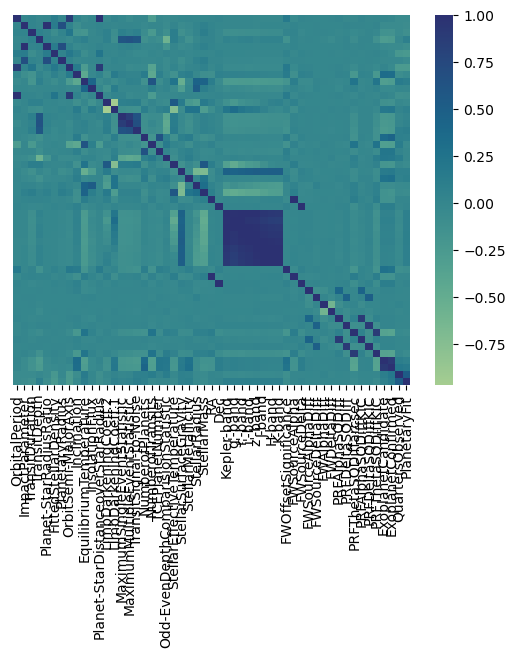

In [265]:
sns.heatmap(data.corr(), cmap = "crest", xticklabels = True, yticklabels = False)

Kepler-band, g'-band, etc. are all correlated (big block in middle)

In [266]:
data_no_band = data.drop(columns = ["g'-band", "r'-band", "i'-band", "z'-band", "J-band", "H-band", "K-band"])
data_no_band.head()

,OrbitalPeriod,ImpactParameter,TransitDuration,TransitDepth,Planet-StarRadiusRatio,FittedStellarDensity,PlanetaryRadius,OrbitSemi-MajorAxis,Inclination,EquilibriumTemperature,InsolationFlux,Planet-StarDistanceoverStarRadius,LimbDarkeningCoeff.2,LimbDarkeningCoeff.1,MaximumSingleEventStatistic,MaximumMultipleEventStatistic,TransitSignal-to-Noise,NumberofPlanets,NumberofTransits,TCEPlanetNumber,Odd-EvenDepthComparisionStatistic,StellarEffectiveTemperature,StellarSurfaceGravity,StellarMetallicity,StellarRadius,StellarMass,RA,Dec,Kepler-band,FWOffsetSignificance,FWSourceAlpha,FWSourceDelta,FWSourceAlphaDiff,FWSourceDeltaDiff,FWAlphaDiff,FWDeltaDiff,PRFAlphaSQDiff,PRFDeltaSQDiff,PRFThetaSQDiffarcsec,PRFAlphaSQDiffKIC,PRFDeltaSQDiffKIC,PRFThetaSQDiffKIC,ExoplanetCandidate,ExoplanetConfirmed,QuartersObserved,PlanetaryFit
0,9.488036,0.146,2.95750,615.8,0.022344,3.20796,2.26,0.0853,89.66,793.0,93.59,24.810,0.2291,0.4603,5.135849,28.470820,35.8,2,142.0,1.0,0.6864,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.347,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320,1,2,17,2
1,54.418383,0.586,4.50700,874.8,0.027954,3.02368,2.83,0.2734,89.57,443.0,9.11,77.900,0.2291,0.4603,7.027669,20.109507,25.8,2,25.0,2.0,0.0023,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.347,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500,1,2,17,2
2,19.899140,0.969,1.78220,10829.0,0.154046,7.29555,14.60,0.1419,88.96,638.0,39.30,53.500,0.2711,0.3858,37.159767,187.449100,76.3,1,56.0,1.0,0.6624,5853.0,4.544,-0.18,0.868,0.961,297.00482,48.134129,15.436,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027,1,1,14,2
3,1.736952,1.276,2.40641,8079.2,0.387394,0.22080,33.46,0.0267,67.09,1395.0,891.96,3.278,0.2865,0.3556,39.066550,541.895100,505.6,1,621.0,1.0,0.0000,5805.0,4.564,-0.52,0.791,0.836,285.53461,48.285210,15.597,0.000,19.035638,48.28521,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276,0,0,14,2
4,2.525592,0.701,1.65450,603.3,0.024064,1.98635,2.75,0.0374,85.41,1406.0,926.16,8.750,0.2844,0.3661,4.749945,33.191900,40.9,1,515.0,1.0,0.3090,6031.0,4.438,0.07,1.046,1.095,288.75488,48.226200,15.509,0.733,19.250326,48.22626,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070,1,2,16,2


In [267]:
# removes all rows with a null value
data_no_null = data.dropna()
data_no_null.shape

(6682, 53)

ways of preprocessing: 
drop kepler-band, don't drop kepler-band stuff.

drop all null rows, or do imputation or smth

get rid of limb darkening stuff? 

numberofplanets and TCEPlanetnumber are the same, also may cause bias due to that one being counted or not

RA and Dec irrelevant to this

do anaylis of only the FW stuff

# Testing Models

basically no preprocessing, only dropping na
this is our baseline to compare against

In [295]:
features = get_features(data_no_null)
targets = get_targets(data_no_null)

# test_models prints out data for our 5 models
test_models(features, targets, 0.4)

Proportion of testing size: 0.4
Logistic Regression:


C:\Users\brian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation Metrics:
Accuracy: 0.9016086793864572
Recall: 0.9425517702070808
F1 Score: 0.9147487844408428
Precision: 0.8885390428211587
Confusion Matrix:
 TN,  FP, FN, TP
[ 999  177   86 1411]


K nearest neighbors:
Evaluation Metrics:
Accuracy: 0.799850355405911
Recall: 0.8891115564462257
F1 Score: 0.8326556146387237
Precision: 0.7829411764705883
Confusion Matrix:
 TN,  FP, FN, TP
[ 807  369  166 1331]


Decision tree:
Evaluation Metrics:
Accuracy: 0.8986157875046764
Recall: 0.9124916499665998
F1 Score: 0.9097569097569097
Precision: 0.9070385126162018
Confusion Matrix:
 TN,  FP, FN, TP
[1036  140  131 1366]


Random forest:
Evaluation Metrics:
Accuracy: 0.9337822671156004
Recall: 0.9458917835671342
F1 Score: 0.9411764705882353
Precision: 0.9365079365079365
Confusion Matrix:
 TN,  FP, FN, TP
[1080   96   81 1416]




## Using FW only

In [298]:
data_FW = data.iloc[:, 36:51]
data_FW.head()

,FWOffsetSignificance,FWSourceAlpha,FWSourceDelta,FWSourceAlphaDiff,FWSourceDeltaDiff,FWAlphaDiff,FWDeltaDiff,PRFAlphaSQDiff,PRFDeltaSQDiff,PRFThetaSQDiffarcsec,PRFAlphaSQDiffKIC,PRFDeltaSQDiffKIC,PRFThetaSQDiffKIC,ExoplanetCandidate,ExoplanetConfirmed
0,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320,1,2
1,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500,1,2
2,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027,1,1
3,0.000,19.035638,48.28521,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276,0,0
4,0.733,19.250326,48.22626,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070,1,2


(9564, 15)

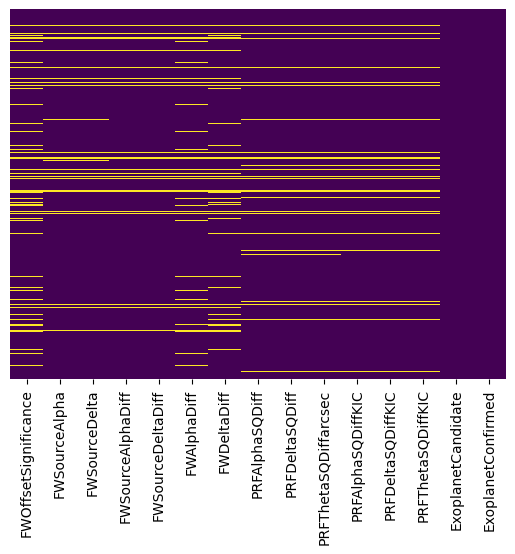

In [299]:
sns.heatmap(data_FW.isnull(),yticklabels=False,cbar=False,cmap='viridis')
data_FW.shape

In [300]:
data_FW = data_FW.dropna()
data_FW.shape

(8269, 15)

In [301]:
features_FW = get_features(data_FW)
targets_FW = get_targets(data_FW)

test_models(features_FW, targets_FW, 0.4)

Proportion of testing size: 0.4
Logistic Regression:
Evaluation Metrics:
Accuracy: 0.7155380894800484
Recall: 0.7992256637168141
F1 Score: 0.7543722265726963
Precision: 0.7142857142857143
Confusion Matrix:
 TN,  FP, FN, TP
[ 922  578  363 1445]


K nearest neighbors:
Evaluation Metrics:
Accuracy: 0.7309552599758162
Recall: 0.7422566371681416
F1 Score: 0.7509792949076664
Precision: 0.7599093997734995
Confusion Matrix:
 TN,  FP, FN, TP
[1076  424  466 1342]


Decision tree:
Evaluation Metrics:
Accuracy: 0.7366989117291415
Recall: 0.7356194690265486
F1 Score: 0.7533276692155196
Precision: 0.7719094602437608
Confusion Matrix:
 TN,  FP, FN, TP
[1107  393  478 1330]


Random forest:
Evaluation Metrics:
Accuracy: 0.813180169286578
Recall: 0.8628318584070797
F1 Score: 0.8346709470304976
Precision: 0.8082901554404145
Confusion Matrix:
 TN,  FP, FN, TP
[1130  370  248 1560]




ok so this stuff is not a good predictor lmao